SÍNDROME RESPIRATÓRIA AGUDA GRAVE (SRAG)

In [ ]:
#Importando as bibliotecas necessárias

import pandas as pd
import numpy as np

In [ ]:
#Extraindo o dataframe através de uma URL

url = 'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2023/INFLUD23-08-01-2024.csv'

df_srag = pd.read_csv(url, sep=';',encoding='utf-8', low_memory=False)
df_srag.shape

In [ ]:
#Obtendo algumas informações sobre o dataframe
df_srag.info()

In [ ]:
#Visualização inicial do data frame
df_srag.head()

In [ ]:
#Lista com as colunas que serão utilizadas durante a analise
lista = [
    'DT_NOTIFIC','DT_SIN_PRI','SG_UF_NOT','CS_SEXO','NU_IDADE_N',
    'TP_IDADE','CS_ZONA','NOSOCOMIAL','FEBRE','TOSSE','GARGANTA','DISPNEIA',
    'DESC_RESP','SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT',
    'PERD_PALA','OUTRO_SIN','FATOR_RISC'
]

In [ ]:
#Removendo as colunas que não serão utilizadas
df_srag.drop(columns=df_srag.columns.difference(lista), inplace=True)

In [ ]:
#Verificando a quantidade de valores nulos por coluna
nulos = df_srag.isnull().sum()
nulos

In [ ]:
#Verificando o tipo de dados das colunas
df_srag.dtypes

In [ ]:
#Fazendo alteração dos tipos de dados relacionados a data

df_srag['DT_NOTIFIC'] = pd.to_datetime(df_srag.DT_NOTIFIC, format='%d/%m/%Y')
df_srag['DT_SIN_PRI'] = pd.to_datetime(df_srag.DT_SIN_PRI, format='%d/%m/%Y')


In [ ]:
#Criando um dicionario para alteração dos valores 
dic = {
    1.0: 'Sim',
    2.0: 'Não',
    9.0: 'Não',
}

In [ ]:
#Fazendo alterações nas colunas
lista_alteracao = [
    'NOSOCOMIAL','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP',
    'SATURACAO','DIARREIA','VOMITO','DOR_ABD','FADIGA','PERD_OLFT',
    'PERD_PALA','OUTRO_SIN','FATOR_RISC'
]

for i in lista_alteracao:
    df_srag.replace({i:dic}, inplace=True)

df_srag

In [ ]:
#Substituindo valores nulos

for i in lista_alteracao:
    df_srag[i].fillna('Não', inplace= True)

df_srag

In [ ]:
#Alterando a idade das crianças com base no tipo
#Obs.: Posteriormente não serão considerados dias e meses no estudo, por isso a alteração
df_srag.loc[df_srag['TP_IDADE'] == 1, 'NU_IDADE_N'] = 0
df_srag.loc[df_srag['TP_IDADE'] == 2, 'NU_IDADE_N'] = 0


In [ ]:
#Removendo a coluna tipo de idade
df_srag.drop(columns='TP_IDADE', inplace=True)

In [ ]:
#Criando um dicionario para alteração de zonas geográficas
dic_zona = {
    1.0:'Urbana',
    2.0:'Rural',
    3.0:'Periurbana',
    9.0:'Ignorado'
}

In [ ]:
#Alterando o valor de zonas geográficas
df_srag.replace({'CS_ZONA': dic_zona}, inplace=True)
df_srag.CS_ZONA.fillna('Ignorado', inplace=True)
df_srag.head()
 

In [ ]:
#Visualização do final do data frame
df_srag.tail()

In [ ]:
#Criando o nome das colunas para alteração
nome_colunas = {
    'SG_UF_NOT':'UF_NOT',
    'CS_SEXO': 'SEXO',
    'NU_IDADE_N': 'IDADE',
    'CS_ZONA': 'ZONA',
    'DESC_RESP': 'DESCON_RESP',
}

In [ ]:
#Alterando o nome das colunas
df_srag.rename(columns=nome_colunas, inplace=True)


In [ ]:
#verificando as novas informações
df_srag.info()

In [ ]:
#Verificando o novo data frame
df_srag.head()

In [ ]:
#Importando a biblioteca matplotlib

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#Criando a coluna meses para criação de um novo grafico

df_srag['MESES'] = df_srag['DT_NOTIFIC'].dt.month
df_srag['MESES']

In [ ]:
#Criando um dicionario com o nome dos meses

dic_nome_meses = {
    1 : 'Jan',
    2 : 'Fev',
    3 : 'Mar',
    4 : 'Abr',
    5 : 'Maio',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Ago',
    9 : 'Set',
    10 : 'Out',
    11 : 'Nov',
    12 : 'Dez',
}

In [ ]:
dic_meses = df_srag['MESES'].value_counts().to_dict()


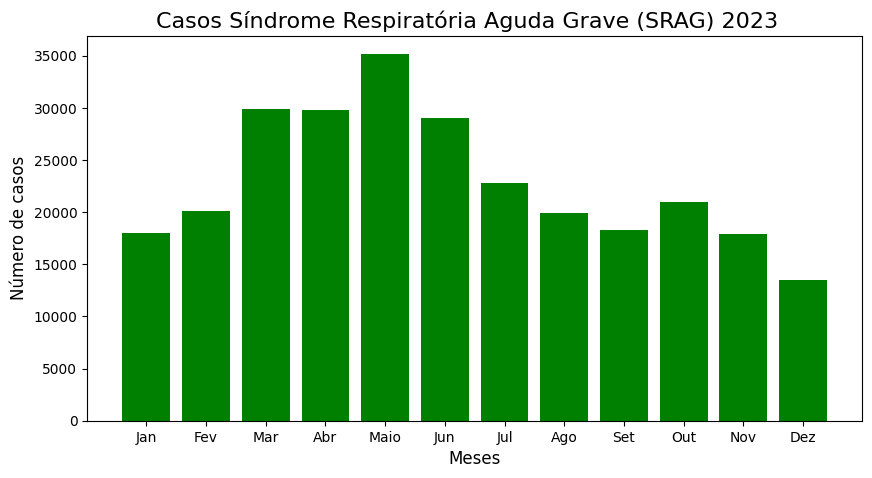

In [33]:
#Criando um grafico de barras com casos notificados por meses

plt.figure(figsize=(10,5))
plt.bar(dic_meses.keys(), dic_meses.values(), color='green')
plt.title('Casos Síndrome Respiratória Aguda Grave (SRAG) 2023  ', fontsize=(16))
plt.xlabel('Meses', fontsize=(12))
plt.ylabel('Número de casos', fontsize=(12))

ticks = np.arange(min(df_srag['MESES']), max(df_srag['MESES'] + 1))  
plt.xticks(ticks, dic_nome_meses.values())  


plt.show()


In [ ]:
#Criando um dicionario para utilização de porcentagem no grafico
dic_uf = df_srag['UF_NOT'].value_counts().to_dict()


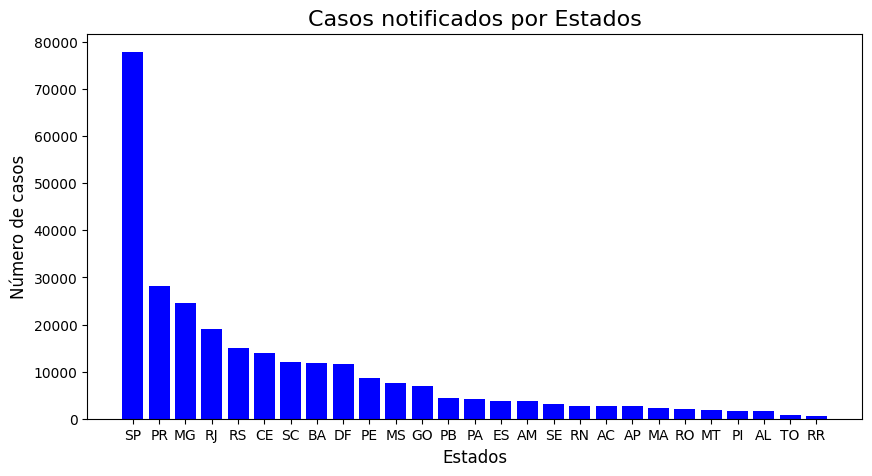

In [34]:
#Criando um grafico de barras com casos notificados por meses

plt.figure(figsize=(10,5))
plt.bar(dic_uf.keys(), dic_uf.values(), color='blue')
plt.title('Casos notificados por Estados', fontsize=(16))
plt.xlabel('Estados', fontsize=(12))
plt.ylabel('Número de casos', fontsize=(12))

  


plt.show()

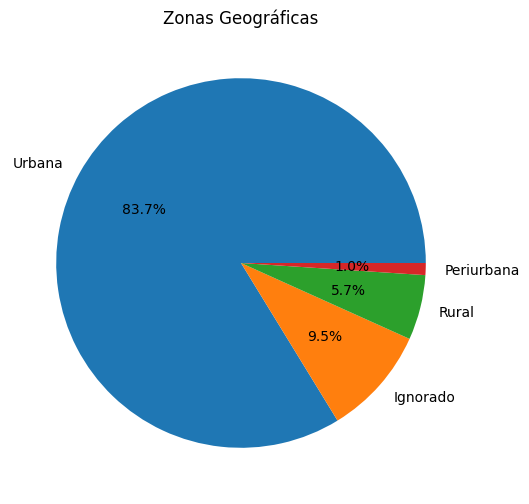

In [35]:
#Grafico de pizza com porcentagem da zona geografica

plt.figure(figsize=(8,6))
df_zona = df_srag['ZONA'].value_counts().to_dict()
df_zona = pd.DataFrame(df_zona.items(), columns=['zona', 'qntd'])

plt.pie(df_zona['qntd'], labels=df_zona['zona'], autopct='%1.1f%%')
plt.title('Zonas Geográficas')

plt.show()


In [ ]:
#Criando um data frame com os sintomas 
df_sintomas = df_srag.iloc[:,7:-1]
df_sintomas


In [ ]:
#Criando um dicionario com a quantidade de sintomas

dic_sintomas = {}

for sintoma in df_sintomas.columns:
    dic_sintomas[sintoma] = (df_sintomas[sintoma] == 'Sim').sum()

dic_sintomas

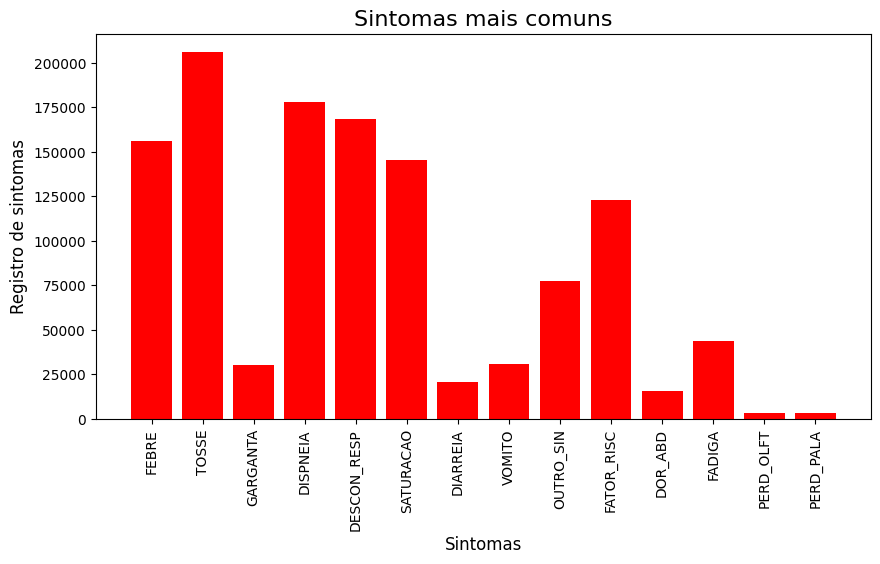

In [36]:
#Criando um grafico de barras com Registro de sintomas 

plt.figure(figsize=(10,5))
plt.bar(dic_sintomas.keys(), dic_sintomas.values(), color='red')
plt.title('Sintomas mais comuns', fontsize=(16))
plt.xlabel('Sintomas', fontsize=(12))
plt.ylabel('Registro de sintomas', fontsize=(12))

plt.xticks(rotation = 90);